Validación Hold-Out 70/30
Accuracy (Hold-Out 70/30): 0.7537


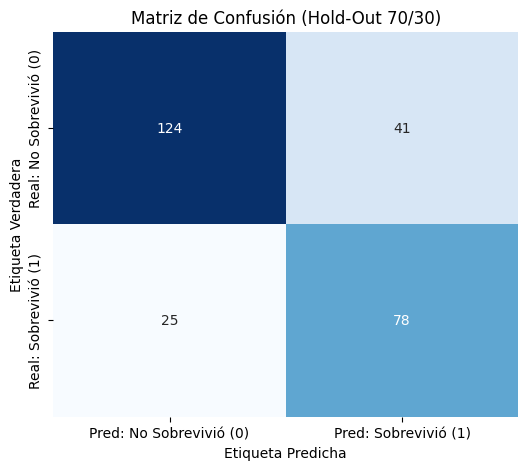

Fold Cross-Validation (K=10)
Accuracy: 0.7744
Desviación Estándar: 0.0410


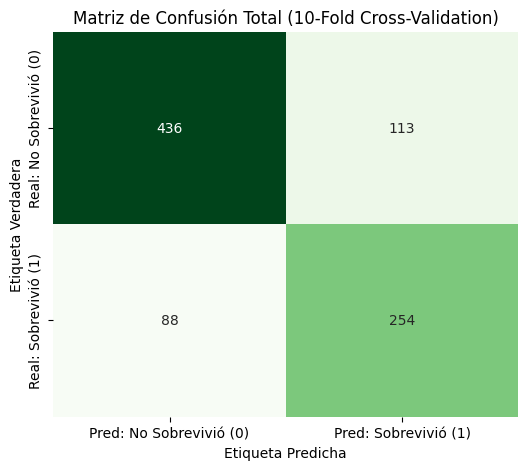

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import NearestCentroid


FILE_NAME = 'Titanic.csv'

try:
    
    data = pd.read_csv(FILE_NAME)
    data = data.rename(columns={'Survived': 'Survived'})
    data['Survived'] = data['Survived'].astype(int)
   

except FileNotFoundError:

    raise  

X = data.drop('Survived', axis=1)
y = data['Survived']


numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Clasificador de distancia minima
model = NearestCentroid()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


# HO 30/70

print("Validación Hold-Out 70/30")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)
y_pred_holdout = pipeline.predict(X_test)

accuracy_holdout = accuracy_score(y_test, y_pred_holdout)
conf_matrix_holdout = confusion_matrix(y_test, y_pred_holdout)

print(f"Accuracy (Hold-Out 70/30): {accuracy_holdout:.4f}")

#  MATRIZ DE CONFUSIÓN (HOLD-OUT)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_holdout, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: No Sobrevivió (0)', 'Pred: Sobrevivió (1)'],
            yticklabels=['Real: No Sobrevivió (0)', 'Real: Sobrevivió (1)'])
plt.title('Matriz de Confusión (Hold-Out 70/30)')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show() 


#Cross Validation

print("Fold Cross-Validation (K=10)")

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv)
conf_matrix_cv = confusion_matrix(y, y_pred_cv)

print(f"Accuracy: {scores.mean():.4f}")
print(f"Desviación Estándar: {scores.std():.4f}")

#  MATRIZ DE CONFUSIÓN FOLD
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred: No Sobrevivió (0)', 'Pred: Sobrevivió (1)'],
            yticklabels=['Real: No Sobrevivió (0)', 'Real: Sobrevivió (1)'])
plt.title('Matriz de Confusión Total (10-Fold Cross-Validation)')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show() 

